# Project 4: Finding Heavy Traffic Indicators on I-94
--https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
traffic = pd.read_csv('Downloads/Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

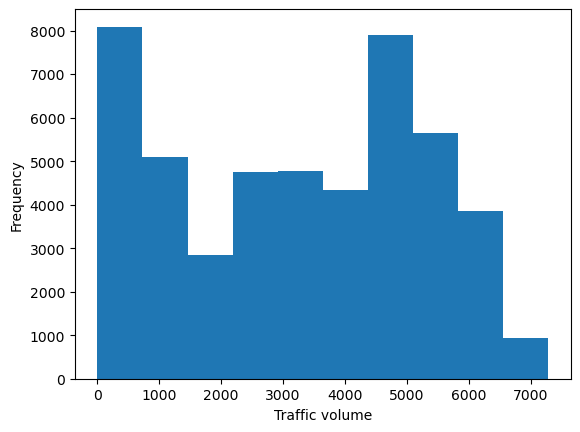

In [6]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume')
plt.plot()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- Traffic volume varied from 0 to 7280, with average of 3259
- 25% of the time with low volume of below 1193 may be happen on night time
- The other 25% with high volume of over 4933 (more than 4 times as much)

## Traffic Volume: Day vs. Night

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic_day = traffic[(traffic['date_time'].dt.hour >= 7)&(traffic['date_time'].dt.hour < 19)]
traffic_night = traffic[(traffic['date_time'].dt.hour < 7)|(traffic['date_time'].dt.hour >= 19)]

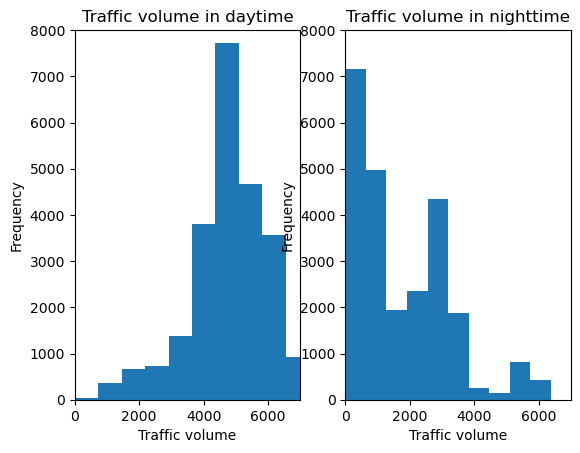

In [11]:
plt.subplot(1,2,1)
traffic_day['traffic_volume'].plot.hist()
plt.title('Traffic volume in daytime')
plt.xlabel('Traffic volume')
plt.ylim(0,8000)
plt.xlim(0,7000)
plt.subplot(1,2,2)
traffic_night['traffic_volume'].plot.hist()
plt.title('Traffic volume in nighttime')
plt.xlabel('Traffic volume')
plt.ylim(0,8000)
plt.xlim(0,7000)
plt.show()

In [12]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- Average volume in the daytime is much larger than nighttime (4649 compare to 1654)
- Traffic volume in daytime seems to be left skewed while nighttime is right skewed
- The traffic is light at night, our goal is to find indicators of heavy traffic so we should focus on the daytime

# Time Indicators

C:\Users\builu\AppData\Local\Temp\ipykernel_8796\3217643380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['month'] = traffic_day['date_time'].dt.month


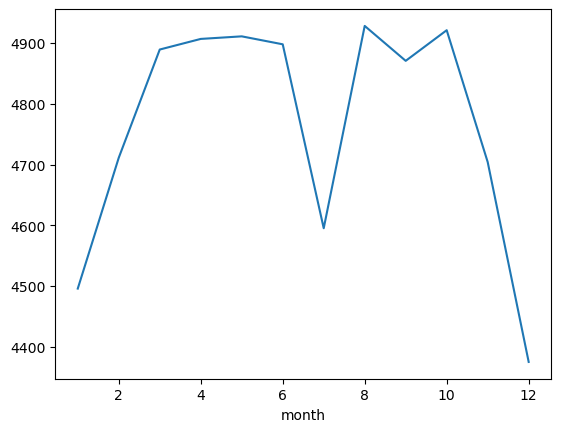

In [16]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume'].plot.line()
plt.show()

The traffic seems to be more heavy from March to October execpt for July, so let dig in anual data of July to see if any partern

C:\Users\builu\AppData\Local\Temp\ipykernel_8796\3425757942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['year'] = traffic_day['date_time'].dt.year


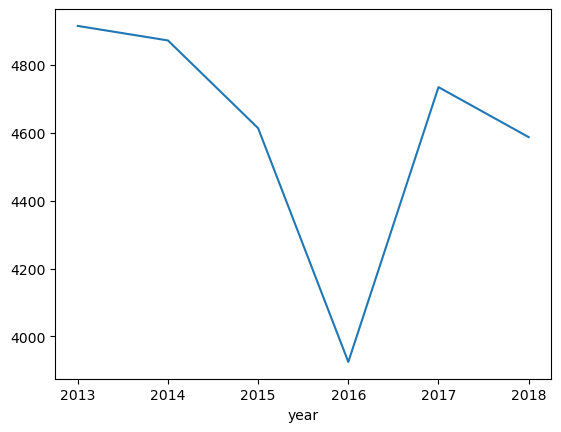

In [18]:
traffic_day['year'] = traffic_day['date_time'].dt.year
by_year = traffic_day[traffic_day['month'] == 7].groupby('year').mean(numeric_only=True)
by_year['traffic_volume'].plot.line()
plt.show()

The traffic of July is typically heavy like the other month from March to October but only special light in 2016 --> may be due to construction or somethings

C:\Users\builu\AppData\Local\Temp\ipykernel_8796\1259083250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek


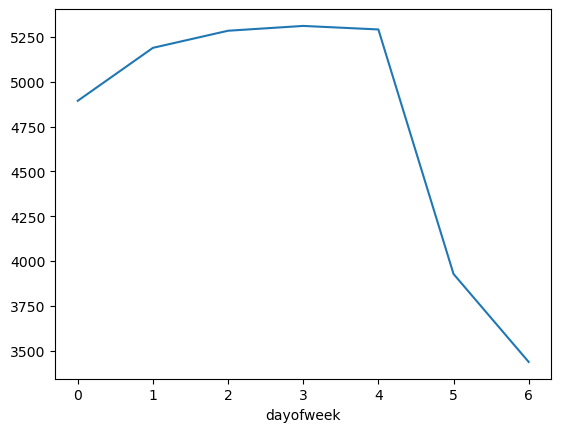

In [20]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.show()
# 0 is Monday, 6 is Sunday

The volume on weekend is significantly heavier than work day

In [22]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
business_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\builu\AppData\Local\Temp\ipykernel_8796\2437959891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['hour'] = traffic_day['date_time'].dt.hour


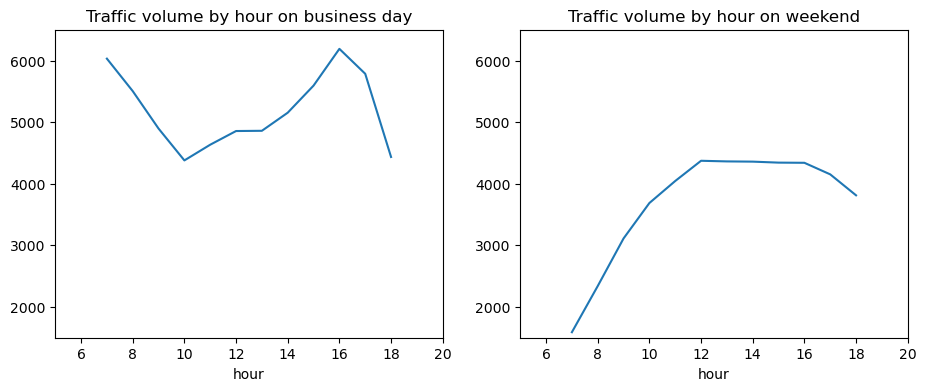

In [23]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic volume by hour on business day')
plt.xlim(5,20)
plt.ylim(1500,6500)
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic volume by hour on weekend')
plt.xlim(5,20)
plt.ylim(1500,6500)
plt.show()

- On business day, the traffic volume is heavier than weekend and peak at 6am, 4pm
- On weekend, the traffic volume is quite low

# Weather Indicators

In [26]:
traffic_day.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The strongest correlation is temp

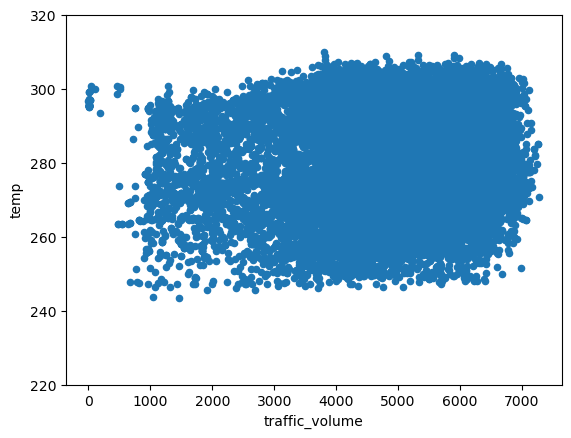

In [28]:
traffic_day.plot.scatter('traffic_volume','temp')
plt.ylim(220,320)
plt.show()

temp does seem like reliable indicator for heavy traffic volume

In [30]:
by_weather_main = traffic_day.groupby('weather_main').mean(numeric_only=True)
by_weather_description = traffic_day.groupby('weather_description').mean(numeric_only=True)

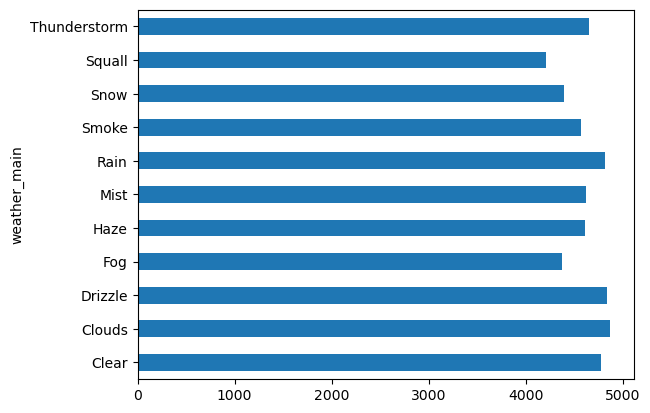

In [31]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Traffic volume dose not exceed 5000

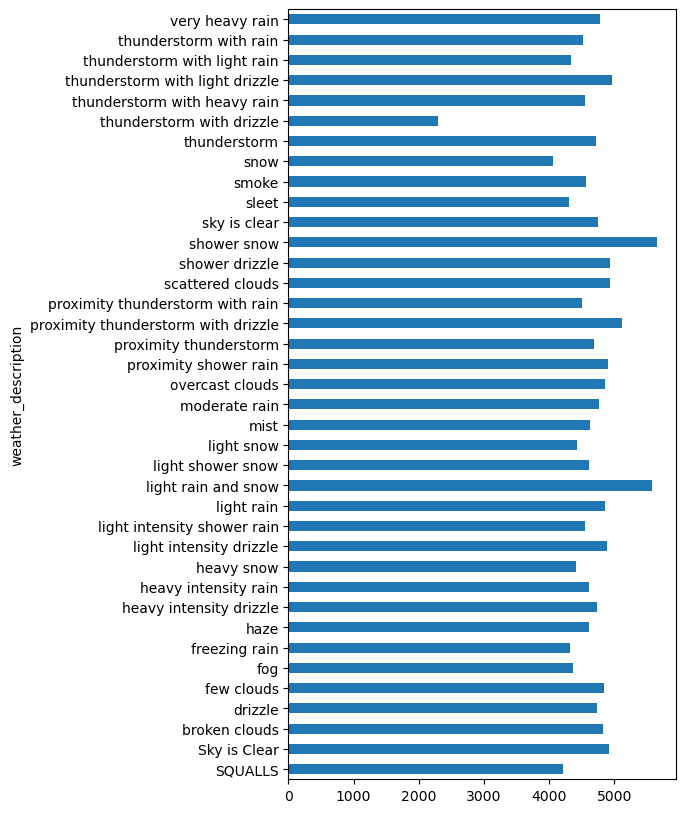

In [33]:
by_weather_description['traffic_volume'].plot.barh(figsize = (5,10))
plt.show()

There are some kind of weather that have traffic volume exceed 5000: showe snow, light rain and snow, proximity thunderstorm with drizzle

# Conclusion

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle